# L'acquisition de données

### Séparation des articles

In [147]:
import numpy as np
import pandas as pd

#Fonction pour collecter les articles de chaque fichier .txt
def ArticleCollect(filename): 
    final_data=[]
    data = pd.read_csv(filename,sep="\n",header=None)
    temp=""
    for i in range(len(data)):
        if '----------' not in data[0][i]:
            temp+= "". join(data[0][i])
        else:
            final_data.append(temp)
            temp=""
            continue
    final_data.append(temp)
    return final_data

#Application de la fonction pour chaque .txt

culture=ArticleCollect('culture.txt')
economie=ArticleCollect('economie.txt')
politique=ArticleCollect('politique.txt')
societe=ArticleCollect('societe.txt')
sport=ArticleCollect('sport.txt')

#vérification du nombre d'articles dans chaque .txt
print("le nbr d'articles pour chaque catégorie : ")
print("culture : ",len(culture),"\neconomie : ",len(economie),"\npolitique",len(politique),
     "\nsociete : ",len(societe),"\nsport : ",len(sport))


le nbr d'articles pour chaque catégorie : 
culture :  36 
economie :  21 
politique 28 
societe :  28 
sport :  29


### regrouper les fichiers dans une seule data set

In [149]:
pd_culture=pd.DataFrame({'Article':culture,'Categorie':'culture'})
pd_eco=pd.DataFrame({'Article':economie,'Categorie':'economie'})
pd_politique=pd.DataFrame({'Article':politique,'Categorie':'politique'})
pd_societe=pd.DataFrame({'Article':societe,'Categorie':'societe'})
pd_sport=pd.DataFrame({'Article':sport,'Categorie':'sport'})

dataset = pd.concat([pd_culture,pd_eco,pd_politique,pd_societe,pd_sport],ignore_index=True) 
dataset  #142 lignes et 2 colonnes

,Article,Categorie
0,La célébration de Rabat capitale de la culture...,culture
1,Les productions de la Société Nationale de Rad...,culture
2,La Fondation pour la Sauvegarde du Patrimoine ...,culture
3,"La Présidence du ministère public participera,...",culture
4,Le Centre régional arabe pour le patrimoine mo...,culture
...,...,...
137,Liverpool a publié un communiqué disant qu’il ...,sport
138,"Le Real Madrid a dominé Liverpool (1-0), ce sa...",sport
139,Le Youssoufia de Berrechid (CAYB) s’est qualif...,sport
140,Le coup d’envoi de la finale de Ligue des cham...,sport


### Indexation des categories

In [150]:
#On associe un numéro à chaque catégorie 
dataset['CategoryId'] = dataset['Categorie'].factorize()[0]
dataset.head() #affichage des 5 premières lignes

,Article,Categorie,CategoryId
0,La célébration de Rabat capitale de la culture...,culture,0
1,Les productions de la Société Nationale de Rad...,culture,0
2,La Fondation pour la Sauvegarde du Patrimoine ...,culture,0
3,"La Présidence du ministère public participera,...",culture,0
4,Le Centre régional arabe pour le patrimoine mo...,culture,0


In [151]:
category = dataset[['Categorie', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
print(category)

     Categorie  CategoryId
0      culture           0
36    economie           1
57   politique           2
85     societe           3
113      sport           4


### Visualisation

<AxesSubplot:xlabel='Categorie', ylabel='count'>

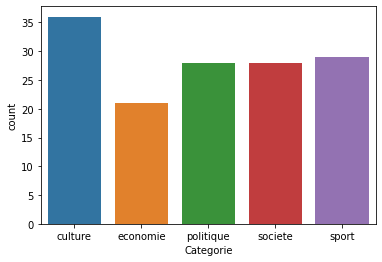

In [152]:
import seaborn as sns
sns.countplot(dataset.Categorie)
#nombre d'articles en fonction de catégorie

# La préparation et le nettoyage de la donnée

### Feature Engineering

In [153]:
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# objectifs de la fonction netoyage :
#Convertir tout en minuscules
#Suppression des stopwords
#Suppression des ponctuations

def netoyage(corpus_ensemble_documents):
    for i in range(len(corpus_ensemble_documents)):
        corpus_ensemble_documents[i]=corpus_ensemble_documents[i].lower()
    for i in range(len(corpus_ensemble_documents)):
        for c in string.punctuation:
            x=corpus_ensemble_documents[i].replace(c,' ')
            corpus_ensemble_documents[i]=x
    stopwords_anglais=stopwords.words('french') #ou french
    for i in range(len(corpus_ensemble_documents)):
        L=corpus_ensemble_documents[i].split()
        for mot in L:
            if mot in stopwords_anglais:
                while mot in L:
                    L.remove(mot)
        corpus_ensemble_documents[i]=" ".join(L)
    return corpus_ensemble_documents

def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)

def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
dataset['Article'] = dataset['Article'].apply(special_char)
dataset['Article'] = dataset['Article'].apply(remove_tags)
data=dataset['Article'].to_numpy()
netoyage(data)
dataset

,Article,Categorie,CategoryId
0,célébration rabat capital culture africain avo...,culture,0
1,production société national radiodiffusion tél...,culture,0
2,fondation sauvegard patrimoine culturel rabat ...,culture,0
3,présidence ministère public participer deuxièm...,culture,0
4,centre régional arabe patrimoine mondial arc w...,culture,0
...,...,...,...
137,liverpool avoir publier communiquer dire extrê...,sport,4
138,real madrid avoir dominer liverpool 1 0 samedi...,sport,4
139,youssoufia berrechid cayb être qualifier demi ...,sport,4
140,coup envoi final ligu champion liverpool real ...,sport,4


In [161]:
#Removing Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('french'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

#Lemmetising the words
def myJoin(text):
    return " ".join([word for word in text])
#lemmetize
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger
from spacy.language import Language
 
#@Language.factory('french_lemmatizer')
def create_french_lemmatizer(nlp, name):
    return LefffLemmatizer(after_melt=True, default=True)

#@Language.factory('melt_tagger')  
def create_melt_tagger(nlp, name):
    return POSTagger()
 
nlp = spacy.load('fr_core_news_sm')
nlp.add_pipe('melt_tagger', after='parser')
nlp.add_pipe('french_lemmatizer', after='melt_tagger')



In [162]:
def myLemmetize(text):
    doc = nlp(text)
    return " ".join([word.lemma_ for word in doc])

In [163]:
dataset['Article'] = dataset['Article'].apply(myLemmetize)

In [167]:
dataset

,Article,Categorie,CategoryId
0,célébration rabat capital culture africain avo...,culture,0
1,production société national radiodiffusion tél...,culture,0
2,fondation sauvegard patrimoine culturel rabat ...,culture,0
3,présidence ministère public participer deuxièm...,culture,0
4,centre régional arabe patrimoine mondial arc w...,culture,0
...,...,...,...
137,liverpool avoir publier communiquer dire extrê...,sport,4
138,real madrid avoir dominer liverpool 1 0 samedi...,sport,4
139,youssoufia berrechid cayb être qualifier demi ...,sport,4
140,coup envoi final ligu champion liverpool real ...,sport,4


### Diviser data par training data and 30%testing data

In [168]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV


In [169]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300  
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
tfidfFit = tfidf.fit_transform(dataset.Article).toarray()
#labels_train = y_train
#print(features_train)

#features_test = tfidf.transform(X_test).toarray()
#labels_test = y_test
#print(features_test.shape)
features_train, features_test, labels_train, labels_test = train_test_split(tfidfFit, 
                                                    y, 
                                                    test_size=0.3)

### Construction des modéles (CLASSIFICATION)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import * 
from sklearn.model_selection import cross_val_score

### Random Forest (sans et avec optimization)

In [382]:
from sklearn.ensemble import RandomForestClassifier
s=0
for i in range(0,10): 
    model  = RandomForestClassifier()
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    accRF=accuracy_score(labels_test, model_predictions)
    s+=accRF
accRF=s/10
print('La moyenne de 10 Accuracy Test (Random Forest Classifier ): ', accRF)

La moyenne de 10 Accuracy Test (Random Forest Classifier ):  0.7372093023255815


In [383]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [386]:
#tunning
from sklearn.model_selection import GridSearchCV
n_estimators = [800, 1200]
max_depth = [7, 9]
min_samples_split = [2, 5]
min_samples_leaf = [3, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   42.5s finished


In [387]:
bestF.best_params_

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 800}

In [388]:
from sklearn.ensemble import RandomForestClassifier
s=0
for i in range(0,10):   
    model1  = RandomForestClassifier(max_depth= 7, min_samples_leaf= 3, min_samples_split= 5, n_estimators= 800)
    model1.fit(features_train, labels_train)
    model_predictions = model1.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accRFGridSearch=s/10
print('La moyenne de 10 Accuracy Test (Random Forest Classifier avec Grid Search): ', accRFGridSearch)

La moyenne de 10 Accuracy Test (Random Forest Classifier avec Grid Search):  0.7232558139534883


### Logistic regression (sans et avec optimization)

In [235]:
model = LogisticRegression()
print(model.get_params())
s=0
for i in range(0,10):   
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accLR=s/10
print('La moyenne de 10 Accuracy Test (LogisticRegression): ', accLR)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
La moyenne de 10 Accuracy Test (LogisticRegression):  0.7209302325581394


### Hyper Parameter Tuning (Logistic Regression)

In [236]:
param_grid = {'C': [0.1,0.001,100],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished


{'C': 100, 'penalty': 'l2'}

In [237]:
s=0
for i in range(0,10):  
    model = LogisticRegression(C=100,solver='liblinear',penalty='l2')
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accLRGridSearch=s/10
print('La moyenne de 10 Accuracy Test (LogisticRegression avec Grid Search): ', accLRGridSearch)


La moyenne de 10 Accuracy Test (LogisticRegression avec Grid Search):  0.8139534883720929


### KNeighborsClassifier avec hyper parameter tunning

In [238]:
s=0
for i in range(0,10):  
    model = KNeighborsClassifier()
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accKNN=s/10
print('La moyenne de 10 Accuracy Test (KNeighbors Classifier): ', accKNN)

La moyenne de 10 Accuracy Test (KNeighbors Classifier):  0.7674418604651162


In [218]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [239]:
model = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    4.1s finished


In [240]:
bestF.best_params_

{'n_neighbors': 4, 'p': 2}

In [231]:
s=0
for i in range(0,10):  
    model = KNeighborsClassifier(n_neighbors=4,p=2)
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accKNNGridSearch=s/10
print('La moyenne de 10 Accuracy Test (KNeighbors Classifier avec Grid Search): ', accKNNGridSearch)

La moyenne de 10 Accuracy Test (KNeighbors Classifier avec Grid Search):  0.7441860465116278


### Decision tree avec tunning

In [251]:
s=0
for i in range(0,10):  
    model = DecisionTreeClassifier()
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accDT=s/10
print('La moyenne de 10 Accuracy Test (Decision Tree): ', accDT)

La moyenne de 10 Accuracy Test (Decision Tree):  0.5139534883720931


In [261]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = [1,2,3,4,5,6,7,9]

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [262]:
bestF.best_params_

{'min_samples_leaf': 7, 'max_depth': None, 'criterion': 'gini'}

In [379]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= None,min_samples_leaf=7)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

Accuracy:  0.5116279069767442


### GaussianNB (sans et avec optimization)

In [268]:
s=0
for i in range(0,10):  
    model = GaussianNB()
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accGaussianNB=s/10
print('La moyenne de 10 Accuracy Test (GaussianNB): ', accGaussianNB)

La moyenne de 10 Accuracy Test (GaussianNB):  0.7674418604651162


In [269]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [275]:
import numpy as np

from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

model = GaussianNB()

parameters = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

gridF = GridSearchCV(model, param_grid=parameters, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


In [276]:
bestF.best_params_

{'priors': None, 'var_smoothing': 1e-08}

In [278]:
s=0
for i in range(0,10):  
    model =GaussianNB(priors=None, var_smoothing= 1e-08)
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accGaussianNB=s/10
print('La moyenne de 10 Accuracy Test (GaussianNB avec Grid Search): ', accGaussianNB)

La moyenne de 10 Accuracy Test (GaussianNB avec Grid Search):  0.7674418604651162


### SVC

In [395]:
s=0
for i in range(0,10):  
    model = SVC()
    model.fit(features_train, labels_train)
    model_predictions = model.predict(features_test)
    acc=accuracy_score(labels_test, model_predictions)
    s=s+acc
accSVC=s/10
print('La moyenne de 10 Accuracy Test (SVC): ', accSVC)

La moyenne de 10 Accuracy Test (SVC):  0.7209302325581394


In [397]:
performance_list=[] 
performance_list.append(['Random Forest',accRF])
performance_list.append(['Random Forest Grid Search', accRFGridSearch])
performance_list.append(['Logistic Regression',accLR])
performance_list.append(['Logistic Regression Grid Search',accLRGridSearch])
performance_list.append(['KNN',accKNN])
performance_list.append(['KNN Grid Search', accKNNGridSearch])
performance_list.append(['Decision Tree Classifier',accDT])
performance_list.append(['Gaussain NB',accGaussianNB])
performance_list.append(['SVC',accSVC])


model_performance = pd.DataFrame(data=performance_list)
model_performance.columns=['Model','Test accuracy']
model_performance.sort_values(by=['Test accuracy'],ascending=False)

,Model,Test accuracy
3,Logistic Regression Grid Search,0.813953
7,Gaussain NB,0.767442
5,KNN Grid Search,0.744186
0,Random Forest,0.737209
1,Random Forest Grid Search,0.723256
2,Logistic Regression,0.720930
8,SVC,0.720930
4,KNN,0.697674
6,Decision Tree Classifier,0.513953


### doc2vec

In [203]:
!pip install -U gensim

Requirement already up-to-date: gensim in c:\users\admin\anaconda3\lib\site-packages (4.2.0)


In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [398]:
bbc = pd.DataFrame()
bbc['Article'] = dataset['Article']
bbc['Categorie'] = dataset['CategoryId']
print(bbc.head())
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):   
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled

X_train, X_test, y_train, y_test = train_test_split(bbc.Article, bbc.Categorie, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

                                             Article  Categorie
0  célébration rabat capital culture africain avo...          0
1  production société national radiodiffusion tél...          0
2  fondation sauvegard patrimoine culturel rabat ...          0
3  présidence ministère public participer deuxièm...          0
4  centre régional arabe patrimoine mondial arc w...          0


In [312]:
all_data[0:2]

[TaggedDocument(words=['ancien', 'ministre', 'affaire', 'étranger', 'espagnol', 'arancha', 'gonzalez', 'laya', 'réjouir', 'justice', 'espagnol', 'enterre', 'affaire', 'ghali', 'après', '1', 'an', 'enquête', 'dossier', 'judiciaire', 'selon', 'jamais', 'devoir', 'être', 'ouvrir', 'dont', 'conséquence', 'brouiller', 'décision', 'strictement', 'humanitaire', 'clore', 'aussi', 'après', 'avoir', 'apprendre', 'disculpée', 'avoir', 'vite', 'faire', 'déclarer', 'entretien', 'carlos', 'alsina', 'onder', 'cero', 'si', 'refaire', 'hésiter', 'recommencer', 'raison', 'humanitaire', 'bien', 'sûr', 'referai', 'car', 'adn', 'société', 'espagnol', 'tradition', 'humanitaire', 'cer', 'comme', 'tant', 'autre', 'avoir', 'répondre', 'ancien', 'ministre', 'affaire', 'étranger', 'espagnol', 'ghaligat', 'venir', 'être', 'classer', 'justice', 'espagnol', 'avoir', 'estimer', 'entrée', 'illégal', 'chef', 'milice', 'polisario', 'espagne', 'act', 'politique', 'gouvernemental', 'lier', 'sécurité', 'extérieur', 'espag

In [313]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 142/142 [00:00<00:00, 47654.92it/s]


In [314]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

### Test sur algorithme Logistic Regression

In [348]:
s=0
for i in range(0,10):  
    model = LogisticRegression(n_jobs=1, C=1e5)
    model = model.fit(train_vectors_dbow, y_train)
    model_prediction = model.predict(test_vectors_dbow)
    acc=accuracy_score(model_prediction, y_test)
    s=s+acc
accLRdoc2vec=s/10
print('La moyenne de 10 Accuracy Test (Logistic Regression Doc2vec): ', accLRdoc2vec)

La moyenne de 10 Accuracy Test (Logistic Regression Doc2vec):  0.7674418604651162


### Comparaison entre les algorithmes

In [389]:
performance_list=[] 
performance_list.append(['Random Forest',accRF])
performance_list.append(['Random Forest Grid Search', accRFGridSearch])
performance_list.append(['Logistic Regression',accLR])
performance_list.append(['Logistic Regression Grid Search',accLRGridSearch])
performance_list.append(['KNN',accKNN])
performance_list.append(['KNN Grid Search', accKNNGridSearch])
performance_list.append(['Decision Tree Classifier',accDT])
performance_list.append(['Gaussain NB',accGaussianNB])
performance_list.append(['SVC',accSVC])
performance_list.append(['Logistic Regression Doc2vec',accLRdoc2vec])


model_performance = pd.DataFrame(data=performance_list)
model_performance.columns=['Model','Test accuracy']
model_performance.sort_values(by=['Test accuracy'],ascending=False)

,Model,Test accuracy
3,Logistic Regression Grid Search,0.813953
7,Gaussain NB,0.767442
9,Logistic Regression Doc2vec,0.767442
5,KNN Grid Search,0.744186
0,Random Forest,0.737209
1,Random Forest Grid Search,0.723256
2,Logistic Regression,0.720930
8,SVC,0.720930
4,KNN,0.697674
6,Decision Tree Classifier,0.513953
